In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


                      0
Groen           13739.0
VLAAMS BELANG   15096.0
sp.a            18355.0
Open Vld        26804.0
N-VA            43294.0
CD&V            97819.0
Andere         161292.0


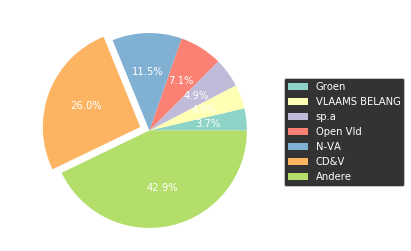

In [2]:
#%matplotlib inline

# module importeren om request te doen
import urllib.request

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm
from collections import OrderedDict

import pandas as pd

#import pylab as pl

import json

# VUL HIER DE GEWENSTE KIESKRING EN PARTIJ IN, PARTIJ HEEFT EEN NUMMER


KieskringArray = ["Aalbeke","Aarsele","Aartrijke","Abele","Adinkerke","Alveringem","Anzegem","Ardooie","Assebroek","Avekapelle","Avelgem","Bavikhove","Beernem","Beerst","Bellegem","Bescheewege","Beselare","Beveren","Beveren ","Beveren","Biest","Bikschote","Bissegem","Blankenberge","Boezinge","Booitshoeke","Bovekerke","Bredene","Brielen","Brugge","Bulskamp","Dadizele","Damme ","De Haan","De Haan-Centrum","De Klijte","De Mokker","De Panne","Deerlijk","Dentergem","Dikkebus","Diksmuide","Doomkerke","Dranouter","Dudzele","Edewalle","Eernegem","Egem","Eggewaartskapelle","Elverdinge","Elzendamme","Emelgem","Esen","Ettelgem","Fortem","Geluwe","Gijverinkhove","Gijzelbrechtegem","Gistel","Gullegem","Handzame","Harelbeke","Haringe","Heestert","Heist","Hertsberge","Heule","Heuvelland ","Hoeke ","Hollebeke","Hooglede","Hoogstade","Houtave","Houtem ","Houthulst","Houtland ","Hulste","Ichtegem","Ieper","Ingelmunster","Ingooigem","Izegem","Izenberge","Jabbeke","Jonkershove","Kaaskerke","Kachtem","Kanegem","Kaster","Keiem","Kemmel","Klemskerke","Klerken","Knokke","Knokke-Heist","Koekelare","Koksijde","Koolkerke","Kortemark","Kortrijk","Krombeke","Kruiseke","Kuurne","Lampernisse","Langemark","Langemark-Poelkapelle","Lauwe","Ledegem","Leffinge","Leisele","Leke","Lendelede","Lichtervelde","Lissewege","Lo","Lo-Reninge","Loker","Lombardsijde","Loppem","Madonna","Mannekensvere","Marialoop","Marke","Markegem","Menen","Merkem","Mesen","Meulebeke","Middelkerke","Moen","Moere","De Moeren ","Moerkerke","Monnikerede","Moorsele","Moorslede","Nieuwkapelle","Nieuwkerke","Nieuwpoort ","Noordschote","Oedelem","Oekene","Oeren","Oeselgem","Ooigem","Oostduinkerke","Oostende","Oostkamp","Oostkerke ","Oostkerke","Oostrozebeke","Oostvleteren","Otegem","Oudekapelle","Oudenburg","Passendale","Pervijze","Pittem","Plassendale","Poelkapelle","Pollinkhove","Poperinge","Proven","Ramskapelle ","Ramskapelle ","Rattevalle","Rekkem","Reninge","Reningelst","Roesbrugge","Roesbrugge-Haringe","Roeselare","Ruddervoorde","Ruiselede","Rumbeke","Sas-Slijkens","Schore ","Sijsele","Sint-Andries","Sint-Baafs-Vijve","Sint-Denijs","Sint-Eloois-Vijve","Sint-Eloois-Winkel","Sint-Idesbald","Sint-Jacobskapelle","Sint-Jan ","Sint-Jan-Ter-Biezen","Sint-Joris ","Sint-Joris ","Sint-Katharinakapelle","Sint-Katrien ","Sint-Kruis","Sint-Michiels","Sint-Pieters-Kapelle ","Sint-Rijkers","Sint-Rita","Slijpe","Slypskapelle","Snaaskerke","Spiere-Helkijn","Staden","Stasegem","Stavele","Steenkerke ","Stuivekenskerke","Tiegem","Tielt","Torhout","Uitkerke","Varsenare","Veldegem","Veurne","Vichte","Vinkem","Vivenkapelle","Vladslo","Vlamertinge","Vleteren ","Vlissegem","Voormezele","Waregem","Watou","Wenduine","Werken","Wervik","Westende","Westkapelle","Westouter","Westrozebeke","Westvleteren","Wevelgem","Wielsbeke","Wijnendale","Wijtschate","Wilskerke","Wingene","Woesten","Woumen","Wulpen","Wulvergem","Wulveringem","Zande","Zandvoorde","Zarren","Zedelgem","Zeebrugge","Zevekote","Zillebeke","Zonnebeke","Zoutenaaie","Zuidschote","Zuienkerke","Zwankendamme","Zwevegem","Zwevezele"]



                  
kieskring = list()
kieskring.append({"gemeente":"dsfdfsd", "partij":"sdfdsfsf"})
# IS BIJNA ALTIJD DEZE PARTIJEN (WE GEBRUIKEN NUMMERS OMDAT DE NAMEN KUNNEN VERANDEREN ADHV COALITIES)
# 1 = SPA
# 2 = NVA
# 3 = CD&V
# 4 = GROEN
# 5 = VLAAMS BELANG
# 6 = OPEN VLD
# 7 = LIJST A
# 8 = PVDA

# variabele om requested data in te plaatsen
kieskringdata = urllib.request.urlopen(
    "http://www.rocre.be/verkiezingen/json.php?fields=kieskring,id,lijstnr,lijst,naamstemmen&duplicates=false").read()

# De data die we terugkeren gaan laden in JSON formaat
data = json.loads(kieskringdata)

# Een nieuwe lokale lijst maken van de stemmen
kieskring_partij = list()
kieskring_kiezers = list()
# Omdat de json data in een wrapper van results zit dit gaan vervangen zodat de code op volgende lijnen korter is.
data = data["results"]



def search(gemeente, partij):
       found = False
       for d in kieskring:
            if(partij in d.values() and gemeente in d.values()):
                return True
            else: 
                found = False
       return found


for x in data:
    if(x["kieskring"] in KieskringArray):
     if(search(x["kieskring"], x["lijst"]) == False):
        if(x["lijst"] in kieskring_partij):
             index = kieskring_partij.index(x["lijst"])
             kieskring_kiezers[index] += float(x["naamstemmen"])
             thisdict = {
             "gemeente": x["kieskring"],
             
             "partij": x["lijst"],
             "stemmen": float(x["naamstemmen"])
             }
             kieskring.append(thisdict)
        else:
         kieskring_partij.append(x["lijst"])
         kieskring_kiezers.append(float(x["naamstemmen"]))
         thisdict = {
             "gemeente": x["kieskring"],
             
             "partij": x["lijst"],
             "stemmen": float(x["naamstemmen"])
         }
         kieskring.append(thisdict)

kieskring.pop(0)

#Alle stemmen per partij minder dan 10000 worden toegeveogd bij andere
other = 0
for index,value in enumerate(kieskring_kiezers):
    if (value < 10000):
        other += float(value)
        kieskring_kiezers[index] = 0
        kieskring_partij[index] = 0


kieskring_kiezers.append(other)
kieskring_partij.append("Andere")

kieskring_kiezers = list(OrderedDict.fromkeys(kieskring_kiezers))
kieskring_partij = list(OrderedDict.fromkeys(kieskring_partij))


a1, a2 = zip(*sorted(zip(kieskring_kiezers, kieskring_partij)))


kieskring_kiezers = list(a1)
kieskring_partij = list(a2)

del kieskring_kiezers[0]
del kieskring_partij[0]


dataframe = pd.DataFrame(kieskring_kiezers, kieskring_partij)
print(dataframe)


fig1,ax1 = plt.subplots()
explode = (0,0, 0, 0,0,0.1,0)

ax1.pie(kieskring_kiezers, explode, labels=kieskring_partij, autopct='%1.1f%%')
ax1.axis('equal')

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])


ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("West Vlaanderen : verdeling van naamstemmen per partij", loc="left")
plt.show()


#CD&V is een populaire partij
#WAT IS POPULAIR???
